In [1]:
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit.visualization import *
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session
service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.least_busy(operational=True, simulator=True)
backend.name

qiskit_runtime_service.__init__:INFO:2024-03-29 07:47:11,958: Default instance: quantum-explorer/group-7/project-2


'ibmq_qasm_simulator'

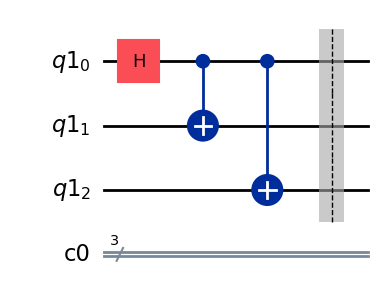

In [2]:
q_reg=QuantumRegister(3)
c_reg=ClassicalRegister(3)
q_ckt = QuantumCircuit(q_reg,c_reg)


# Generating a resource state GHZ state entangled pair for 3 member it will be 3 entangle state to be shared
q_ckt.h(0)
q_ckt.cx(0,1)
q_ckt.cx(0,2)
q_ckt.barrier()
q_ckt.draw()

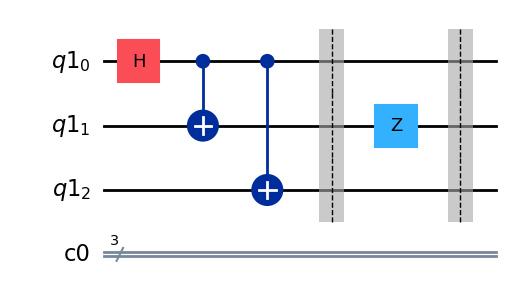

In [3]:
# Now say q2 wants to send some mesage anonymuously in the network so use Z gate
# Encoding the data
q_ckt.z(1)
q_ckt.barrier()
q_ckt.draw()

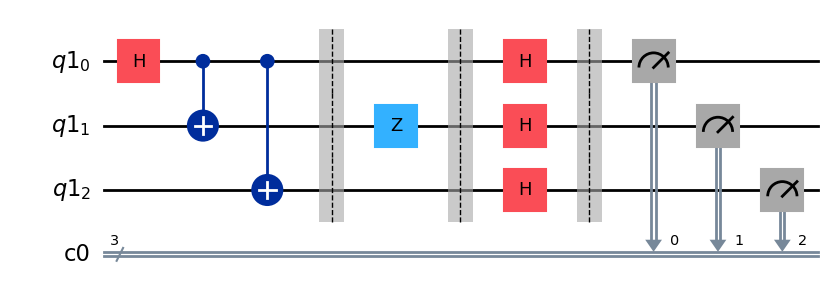

In [4]:
# Now data is encoded to get the result eveyone will add Hadamard gate in their qubit 
# decoding part
q_ckt.h([0,1,2])
q_ckt.barrier()
q_ckt.measure(q_reg,c_reg)
q_ckt.draw()

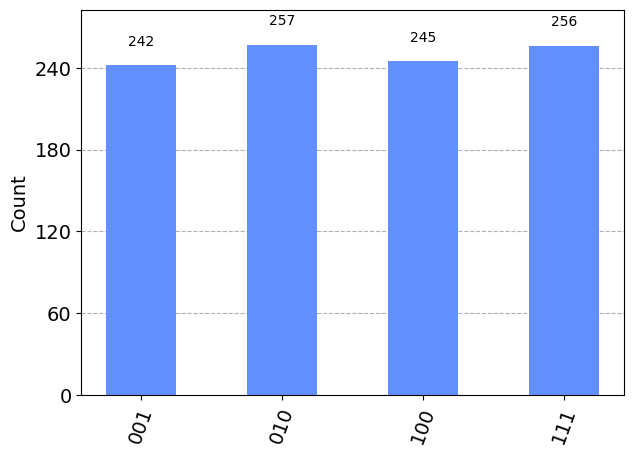

In [5]:

job=backend.run(q_ckt, shots=1000)
count=job.result().get_counts()
plot_histogram(count)

In [6]:
# Here one party that is q2 wants to broadcast the logical information among all anonymously 
# For logic 1 bit information he used Z operation only in his qubit 
# Due to logic 1 bit output sequence will have odd number of ! or hamming one will be odd in output 
# Here we are getting 001 010 100 111 all have weight 1 1 1 3 that is odd number if it was logic zero we use Identity gate while encoding and end up with even no of 1 in output
#Hence concluded someone has encoded logic 1 and transfered the info no one knows who is the person